<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/Medical_Cost_SOLO_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://accessiahealth.org/app/uploads/2024/06/iStock-1351105760.jpg)

## Introduction

Healthcare costs continue to pose one of the most significant economic pressures on individuals, insurers, and society at large. Using the Insurance dataset — which captures personal attributes including age, sex, body mass index (BMI), number of children, smoking status, region, and the actual medical insurance charges billed — this project aims to build a predictive model for insurance cost (“charges”).

By leveraging machine learning (or regression) techniques, the goal is two-fold: (1) understand which factors most strongly drive increasing medical insurance costs, and (2) provide a reliable cost-estimation tool that stakeholders (insurers, policy makers, individuals) can use for decision-making. Through data cleaning, exploratory data analysis, feature engineering, model selection, and evaluation, this work transforms raw variables into actionable insights about the financial risk embedded in health insurance.

## 1- Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score



## 2- Load Dataset

In [2]:
df=pd.read_csv("https://drive.google.com/uc?id=1OC73ZCgCIFavgGs8yjfpHI4JwwYE_Mt4")

In [3]:
le=LabelEncoder()
cols_to_encode = ["sex", "smoker", "region"]

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

We are transforming our object data to numerical with Label Encoder

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


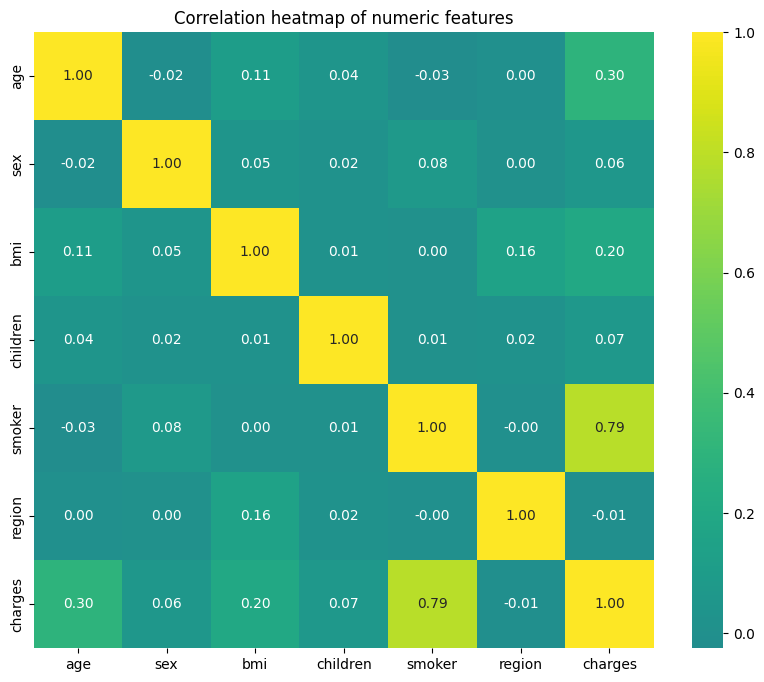

In [5]:
numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap='viridis', center=0)
plt.title('Correlation heatmap of numeric features')
plt.show()

In [ ]:
df=df.drop(columns="region")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Gradiente descendente

In [63]:
def prepareData(data,n):

    x = data.iloc[:, 0:n-1]
    y = data.iloc[:, n-1:n]

    x = np.matrix(x.values)
    y = np.matrix(y.values)
    return x, y

In [64]:
# quitamos la columma objetivo (a predecir)
n = len(df.columns)
print(n)
x, y = prepareData(df,n)
x.shape, y.shape

7


((1338, 6), (1338, 1))

In [65]:
X = x = np.c_[np.ones(x.shape[0]), x]
X.shape

(1338, 7)

In [66]:
print(x[0:5,])

[[ 1.    19.     0.    27.9    0.     1.     3.   ]
 [ 1.    18.     1.    33.77   1.     0.     2.   ]
 [ 1.    28.     1.    33.     3.     0.     2.   ]
 [ 1.    33.     1.    22.705  0.     0.     1.   ]
 [ 1.    32.     1.    28.88   0.     0.     1.   ]]


In [67]:
print(y[0:5,])

[[16884.924  ]
 [ 1725.5523 ]
 [ 4449.462  ]
 [21984.47061]
 [ 3866.8552 ]]


In [88]:
n = len(df.columns)-1
theta = np.matrix(np.zeros((n+1, 1)))
theta.shape


(7, 1)

In [89]:
def computeCost(x, y, theta):
    m = len(y)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

In [90]:
computeCost(X, y, theta)

np.float64(161323436.79435235)

In [80]:
def vector_gradient_descent(x, y, theta,alpha, iterations,epsilon=1e-5):

    cost_anterior = computeCost(x, y, theta)
    convergencia = False
    m= len(x)
    for i in range(iterations):
        hypothesis = x.dot(theta)
        error = hypothesis-y
        gradient = x.T.dot(error)/m
        theta = theta - alpha*gradient
        cost_actual = computeCost(x, y, theta)
        if(abs(cost_actual -cost_anterior)< epsilon):
          convergencia = True
          break
        cost_anterior = cost_actual
    if(convergencia == True):
      print(f"Convergencia alcanzada en {i} iteraciones")
      print(f"coste último {cost_actual}")
      return theta
    else:
      print(f"Convergencia NO alcanzada en {i} iteraciones")
    return theta

In [104]:
iterations = 10000000
alpha = 0.0001
epsilon = 0.00001
n = len(df.columns)-1
#theta = np.matrix(np.zeros((2, 1)))
print(theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [105]:
theta_actual =  vector_gradient_descent(X, y, theta, alpha, iterations,epsilon)
print(theta_actual)

Convergencia alcanzada en 2372566 iteraciones
coste último 18263831.614496008
[[-11804.91343053]
 [   257.23673246]
 [  -131.67205087]
 [   332.33056137]
 [   479.17642785]
 [ 23819.97910519]
 [  -353.82233201]]


In [101]:
##Ecuación normal
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[[-11815.45232123]
 [   257.28807486]
 [  -131.11057962]
 [   332.57013224]
 [   479.36939355]
 [ 23820.43412267]
 [  -353.64001656]]


## 5- Seperate target and features

In [ ]:
x=df.drop(columns="charges")
y=df["charges"]

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

## 6- Linear Regression Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7811302113434095

In [ ]:
y_pred = model.predict(x_test)

# (R2 ve MSE)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R^2 Score: 0.7811302113434095
Mean Squared Error: 33979257.05080821


In [ ]:
scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Cross Validation Scores: ",scores)
print("Mean Score:", scores.mean())

Cross Validation Scores:  [0.76097874 0.70873346 0.7755842  0.73136684 0.7565446 ]
Mean Score: 0.746641566347216


## Conclusion

The modelling exercise revealed several illuminating patterns in the determinants of individual insurance charges. Key drivers — such as smoker status, BMI, and age — consistently emerged as strong predictors of higher costs. For example, smokers incur markedly higher charges compared to non-smokers, emphasising the premium impact of lifestyle choices.
Nonetheless, the model also highlights that certain variables (such as region or number of children) contribute less than might be expected, suggesting that cost predictions cannot rely purely on demographic segmentation. Moreover, while the model achieved respectable performance, it also indicates that a sizeable portion of variance remains unaccounted for — underlining the complexity and individualized nature of healthcare expenses.
Ultimately, this model serves as a valuable decision-support tool but should be used with consideration of its limitations. For future work, integrating longitudinal data, negotiated insurance claims, policy details or non-linear interaction effects could enhance predictive accuracy and yield deeper risk insights